In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from intellegent_placer_lib.image_processing import ObjectBase, compress_image, read_images
from intellegent_placer_lib.image_processing import find_polygon_and_objects
from os import listdir, path
from os import listdir, path
from intellegent_placer_lib.intellegent_placer import fit_in_polygon

## Обработка предметов из набора данных
Загружаем каждую фотографию, сжимаем ее для ускорения обработки

Далее создаем объект - предобработанный предмет из набора данных, который впоследствии будем использовать для сопоставления предметов из датасета

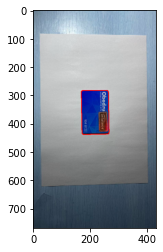

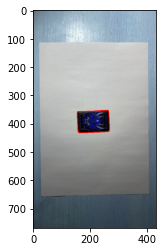

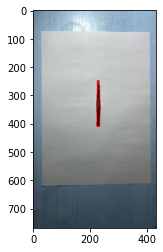

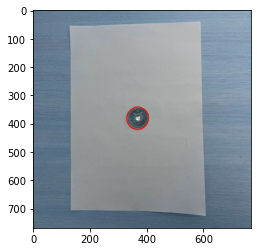

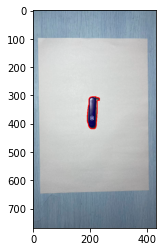

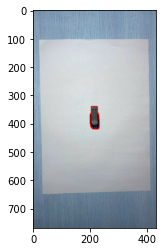

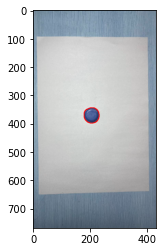

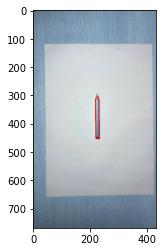

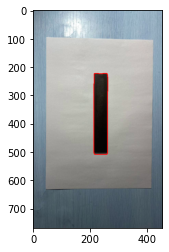

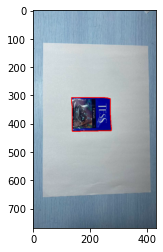

In [2]:
path_to_folder = "images/objects"
for image in listdir(path_to_folder):
    image_path = path.join(path_to_folder, image)
    img = cv2.imread(image_path)
    img = compress_image(img, 60)
    result = ObjectBase(img, image_path)
    processed_items = [(result.mask * 255).astype("uint8"), result.contour_image]
    plt.imshow(result.contour_image)
    plt.show()

## Обработка датасета

Рассмотрим работу алгоритма на тестовых данных

Имя тестовых данных: <номер теста>.jpg

In [3]:
# Для проверки тестовых данных
true_result = {
        "0.jpg": True,
        "1.jpg": False,
        "2.jpg": False,
        "3.jpg": True,
        "4.jpg": True,
        "5.jpg": False,
        "6.jpg": False,
        "7.jpg": True,
        "8.jpg": True,
        "9.jpg": True,
        "10.jpg": False,
        "11.jpg": True,
        "12.jpg": True,
        "13.jpg": True,
        "14.jpg": True,
    }

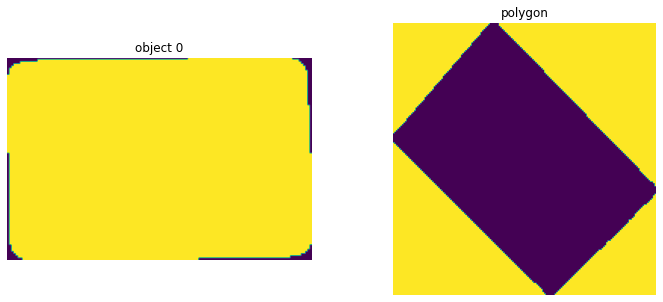

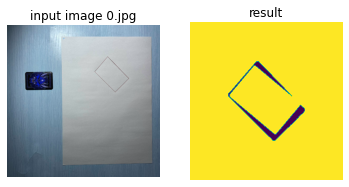

RESULT of image 0.jpg : True


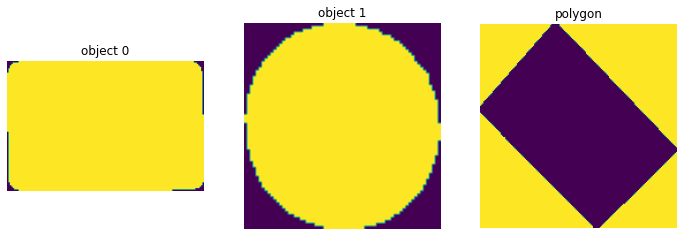

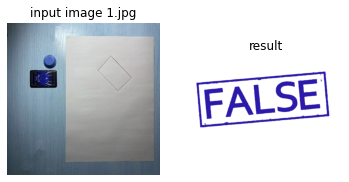

RESULT of image 1.jpg : False


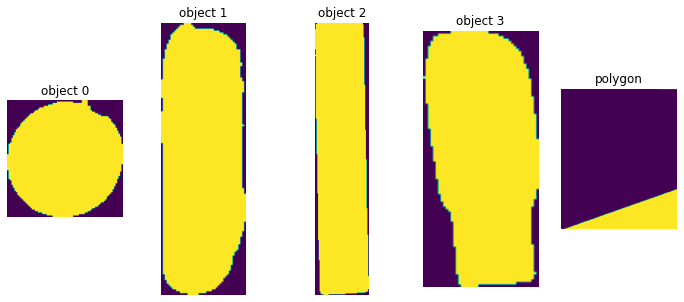

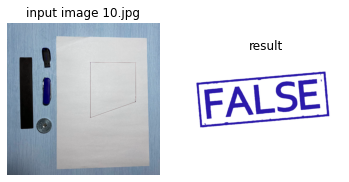

RESULT of image 10.jpg : False


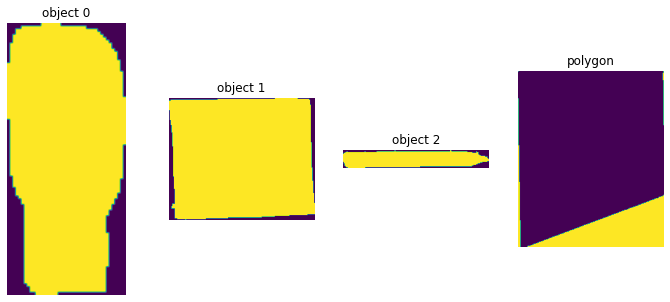

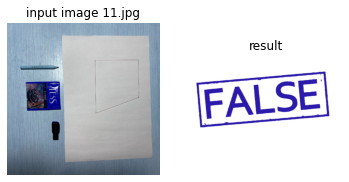

RESULT of image 11.jpg : False


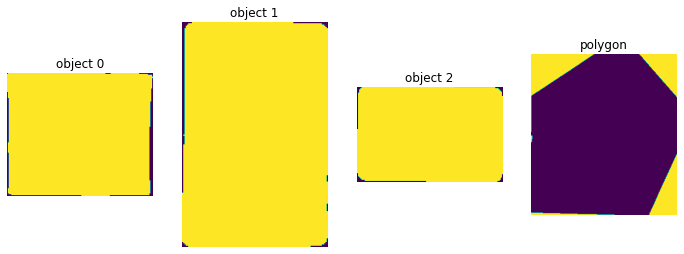

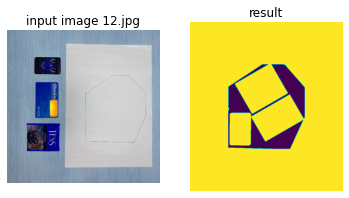

RESULT of image 12.jpg : True


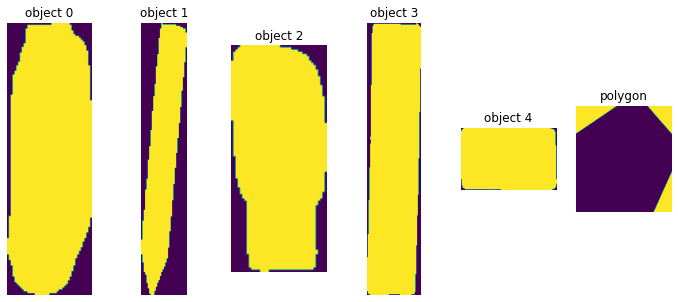

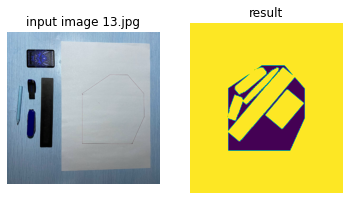

RESULT of image 13.jpg : True


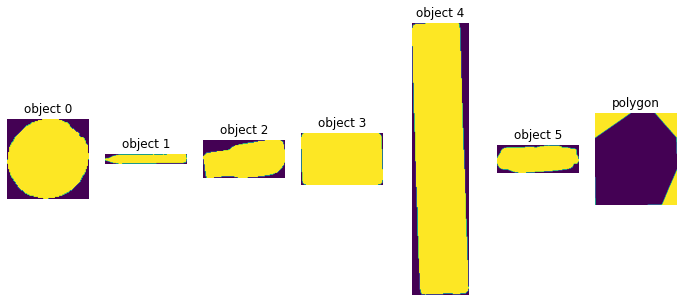

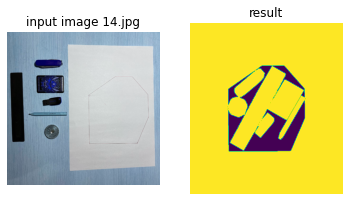

RESULT of image 14.jpg : True


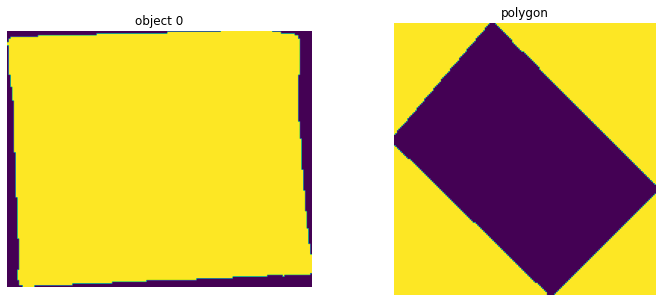

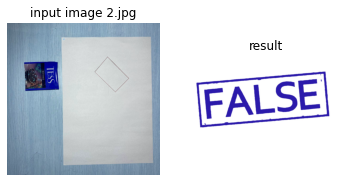

RESULT of image 2.jpg : False


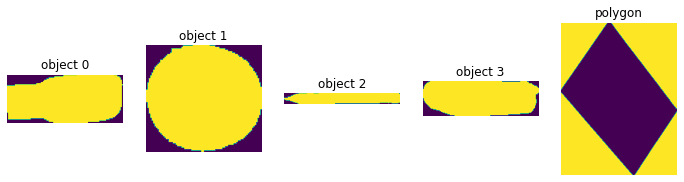

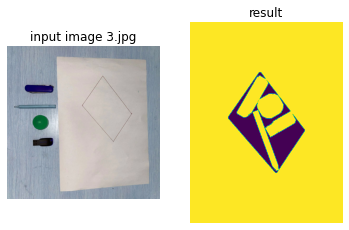

RESULT of image 3.jpg : True


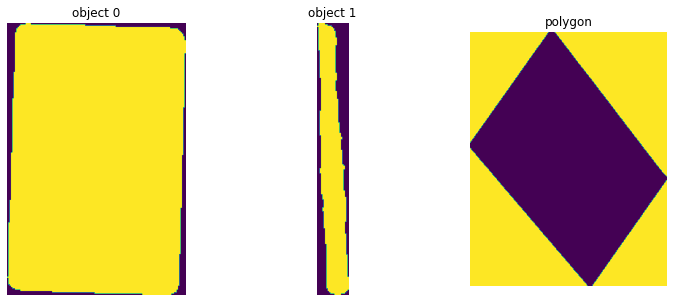

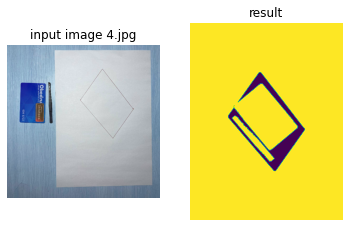

RESULT of image 4.jpg : True


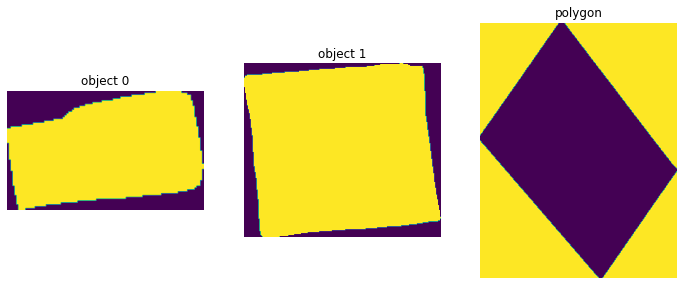

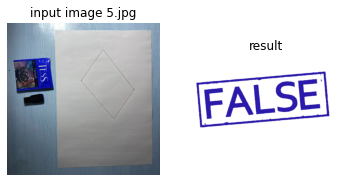

RESULT of image 5.jpg : False


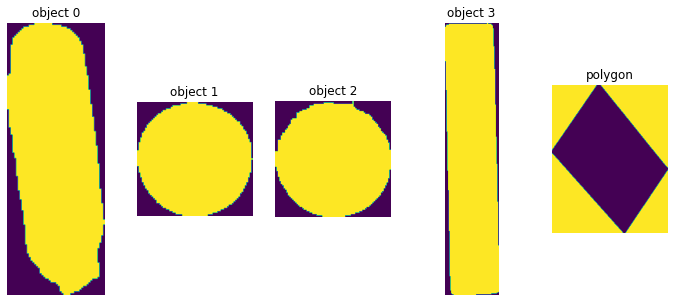

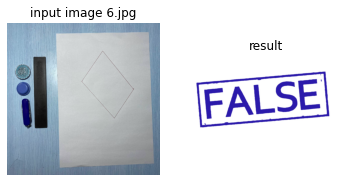

RESULT of image 6.jpg : False


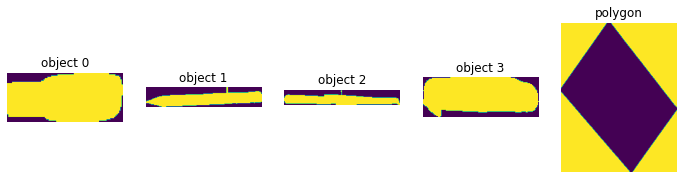

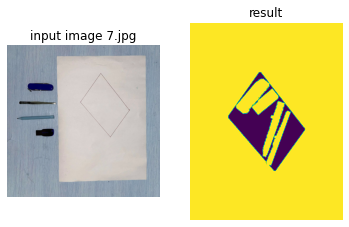

RESULT of image 7.jpg : True


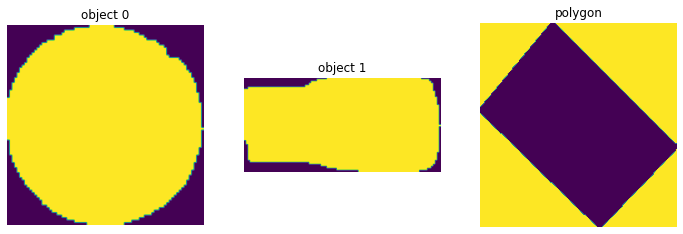

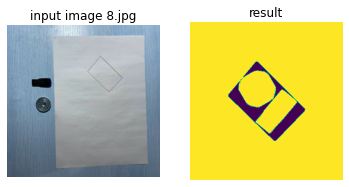

RESULT of image 8.jpg : True


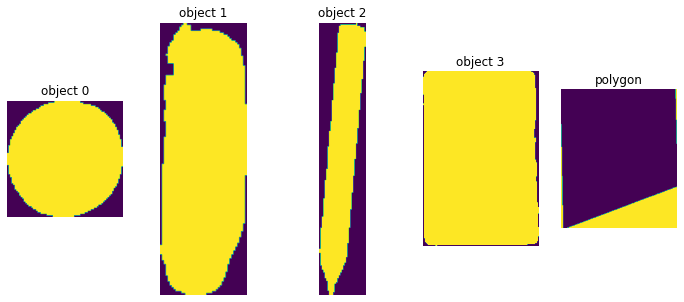

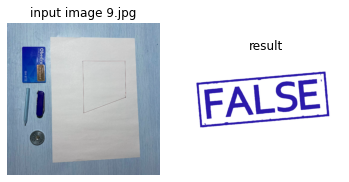

RESULT of image 9.jpg : False


In [4]:
path_to_folder = "images/dataset"
test_count = 15
real_result = 0
polygon = []
object_set= []
for image_path in listdir(path_to_folder):
    if path.splitext(image_path)[1] == ".jpg":
        image_full_path = path.join(path_to_folder, image_path)

        img = cv2.imread(image_full_path, cv2.COLOR_BGR2GRAY)
        img = compress_image(img, 60)
        
        # получаем многоугольник и предметы
        pol, obj_set = find_polygon_and_objects(img)
        polygon.append(pol)
        object_set.append(obj_set)
        fig, axs = plt.subplots(1, len(obj_set) + 1, figsize=(12, 5))
        
        for i in range(len(obj_set)):
            axs[i].imshow(obj_set[i].mask)
            axs.flatten()[i].set_title(f"object {i}")
            axs[i].set_axis_off()
        axs[len(obj_set)].imshow(pol.mask)
        axs[len(obj_set)].set_title("polygon")
        axs[len(obj_set)].set_axis_off()
        
        # размещаем предметы
        ans, result_mask = fit_in_polygon(pol, obj_set)

        fig, ax1 = plt.subplots(1,2)
        ax1[0].imshow(img)
        ax1[0].set_title(f"input image {image_path}")
        ax1[0].set_axis_off()
        if ans:
            ax1[1].imshow(result_mask)
        else:
            ax1[1].imshow(cv2.imread("images/false.jpg"))
        ax1[1].set_axis_off()
        ax1[1].set_title("result")
        plt.show()
        print(f"RESULT of image {image_path} : {ans}")
        if true_result[image_path] == ans:
            real_result += 1

In [5]:
print(f"Accuracy: {real_result/test_count}")

Accuracy: 0.8666666666666667


Как можно заметить, на всех тестовых данных, на которых нельзя было разместить предметы многоугольник, алгоритм выдал правильный ответ False. 
Однако на некоторых правильных тестовых данных ответ получился неверным. Это происходит в том числе из-за того, что при повороте объекта может незначительно исказиться объект. Например, если допустить ошибку в 40 пикселей в тесте 5 (5.jpg), то алгоритм выдаст положительный результат.